# CIFAR10 Dataset for classification

In [28]:
import tensorflow as tf
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
import numpy as np

In [29]:
(X_train,y_train),(X_test,y_test)=datasets.cifar10.load_data()

In [30]:
X_train.shape

(50000, 32, 32, 3)

In [31]:
y_train.shape

(50000, 1)

In [32]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [33]:
y_train=y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [46]:
classes=["airplane","automobile","bird","car","deer","dog","frog","horse","ship","truck"]

In [47]:
classes[1]

'automobile'

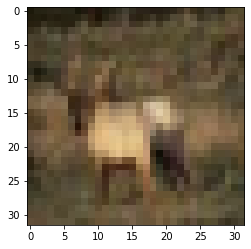

In [48]:
plt.imshow(X_train[3])

In [49]:
def plot_sample(X,y,index):
    plt.figure(figsize=(15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

## 

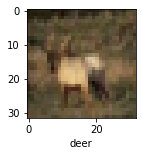

In [52]:
plot_sample(X_train,y_train,3)

In [53]:
X_train=X_train/255
X_test=X_test/255

In [78]:
X_train.shape

(50000, 32, 32, 3)

In [57]:
ann=models.Sequential([
    layers.Flatten(input_shape=(32,32,3)),
    layers.Dense(3000,activation="relu"),
    layers.Dense(1000,activation="relu"),
    layers.Dense(10,activation="sigmoid")
])

ann.compile(optimizer='SGD',
           loss='sparse_categorical_crossentropy',
           metrics=['accuracy'])

ann.fit(X_train,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 49s 31ms/step - loss: 1.8630 - accuracy: 0.3306
Epoch 2/5
1563/1563 [==============================] - 52s 33ms/step - loss: 1.6582 - accuracy: 0.4150
Epoch 3/5
1563/1563 [==============================] - 54s 35ms/step - loss: 1.5719 - accuracy: 0.4431
Epoch 4/5
1563/1563 [==============================] - 58s 37ms/step - loss: 1.5097 - accuracy: 0.4665
Epoch 5/5
1563/1563 [==============================] - 57s 36ms/step - loss: 1.4595 - accuracy: 0.4838


In [63]:
from sklearn.metrics import confusion_matrix,classification_report
import numpy as np
y_pred=ann.predict(X_test)
y_pred_classes=[np.argmax(element) for element in y_pred]

print('classification_report \n',classification_report(y_test,y_pred_classes))

classification_report 
               precision    recall  f1-score   support

           0       0.69      0.38      0.49      1000
           1       0.46      0.78      0.58      1000
           2       0.46      0.16      0.24      1000
           3       0.37      0.36      0.36      1000
           4       0.31      0.58      0.41      1000
           5       0.56      0.20      0.29      1000
           6       0.50      0.55      0.53      1000
           7       0.42      0.68      0.52      1000
           8       0.54      0.69      0.61      1000
           9       0.73      0.19      0.30      1000

    accuracy                           0.46     10000
   macro avg       0.50      0.46      0.43     10000
weighted avg       0.50      0.46      0.43     10000



In [84]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [85]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [86]:
y_train.shape
X_train.shape

(50000, 32, 32, 3)

In [122]:
cnn.fit(X_train, y_train, epochs=20)

Epoch 1/20
1563/1563 [==============================] - 22s 14ms/step - loss: 0.5163 - accuracy: 0.8190
Epoch 2/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.4782 - accuracy: 0.8339
Epoch 3/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.4462 - accuracy: 0.8440
Epoch 4/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.4186 - accuracy: 0.8527
Epoch 5/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.3818 - accuracy: 0.86510s - loss: 0.3
Epoch 6/20
1563/1563 [==============================] - 27s 18ms/step - loss: 0.3533 - accuracy: 0.8749
Epoch 7/20
1563/1563 [==============================] - 30s 19ms/step - loss: 0.3289 - accuracy: 0.8829
Epoch 8/20
1563/1563 [==============================] - 27s 17ms/step - loss: 0.3003 - accuracy: 0.8936
Epoch 9/20
1563/1563 [==============================] - 28s 18ms/step - loss: 0.2799 - accuracy: 0.9007
Epoch 10/20
1563/1563 [===========================

In [123]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 2.2429 - accuracy: 0.6717


[2.2428786754608154, 0.6717000007629395]

In [124]:
#X_test[0]
y_test=y_test.reshape(-1,)
y_test.shape
#plot_sample(X_test,y_test,1)

(10000,)

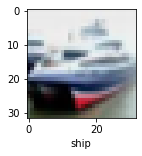

In [125]:
plot_sample(X_test,y_test,1)

In [126]:
y_pred=cnn.predict(X_test)
y_pred[:5]

array([[1.09689315e-08, 1.97439929e-11, 1.06687505e-04, 9.96791780e-01,
        9.94903999e-08, 2.99053174e-03, 4.03279482e-05, 1.61958340e-07,
        7.04563718e-05, 1.77757448e-10],
       [3.94608096e-11, 9.37026925e-03, 4.32364411e-18, 1.57538997e-14,
        3.61857914e-19, 1.99778109e-20, 2.33191141e-21, 1.15131810e-30,
        9.90629733e-01, 8.40214739e-14],
       [3.21635194e-02, 4.02782287e-04, 9.52553023e-07, 4.33199375e-07,
        4.42985720e-06, 3.34784218e-08, 2.24354216e-10, 4.02086318e-01,
        5.65339804e-01, 1.78342430e-06],
       [9.99750197e-01, 3.24560208e-16, 1.39712327e-04, 3.08735815e-11,
        2.12773430e-05, 8.95819606e-13, 7.31340075e-18, 1.66083423e-12,
        8.88399300e-05, 7.16361042e-17],
       [1.08574657e-14, 1.59293185e-14, 1.48931998e-04, 3.47640514e-02,
        1.40921306e-02, 9.12995745e-07, 9.50993896e-01, 9.43511870e-13,
        6.12865268e-14, 9.36101565e-13]], dtype=float32)

In [127]:
np.argmax(y_pred[0])

3

In [128]:
y_classes=([np.argmax(element) for element in y_pred])
y_classes[:4]

[3, 8, 8, 0]

In [129]:
y_test[:4]

array([3, 8, 8, 0], dtype=uint8)

In [130]:
classes

['airplane',
 'automobile',
 'bird',
 'car',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

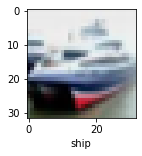

In [131]:
plot_sample(X_test,y_test,1)

In [132]:
classes[y_classes[0]]

'car'

In [133]:
print("classification report \n",classification_report(y_test,y_classes))

classification report 
               precision    recall  f1-score   support

           0       0.71      0.74      0.72      1000
           1       0.80      0.77      0.78      1000
           2       0.53      0.58      0.56      1000
           3       0.49      0.51      0.50      1000
           4       0.65      0.56      0.60      1000
           5       0.56      0.57      0.57      1000
           6       0.77      0.71      0.74      1000
           7       0.69      0.77      0.73      1000
           8       0.74      0.81      0.78      1000
           9       0.81      0.69      0.75      1000

    accuracy                           0.67     10000
   macro avg       0.68      0.67      0.67     10000
weighted avg       0.68      0.67      0.67     10000

